## Task: Predict number of bikers on a given day using linear regression

You are provided with a dataset about Seattle's Fremont Bridge in the form of a csv file.
The data contains different details about a given day, like weather, temperature and other factors (see the dataframe preview below) for more details. The data also contains how many bikers were observed crossing the brudge that day.

You are provided with the code to download and load the csv file.

Your task is to train a linear regression model which takes in the parameters of the day (you can drop the columns that you think you don't need) and predicts the number of bikers according to those parameters.

In [ ]:
from IPython.display import clear_output

In [ ]:
# Don't modify this code


%pip install gdown==4.5


clear_output()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download the CSV file.
!gdown 1_eJU8Y-31_l0oq1sSJT6pROJyo-ufuvD

Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/gdown/cli.py", line 151, in main
    filename = download(
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 203, in download
    filename_from_url = m.groups()[0]
AttributeError: 'NoneType' object has no attribute 'groups'


In [ ]:
path='/content/drive/MyDrive/ex_kaust/bikers_data.csv'


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data_df = pd.read_csv(path)
data_df

,Date,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.00,56.0,1
1,2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.00,56.5,1
2,2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.00,59.5,1
3,2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.00,60.5,1
4,2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.00,60.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,2019-12-27,4552.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.237706,0.01,41.0,0
2642,2019-12-28,3352.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.245532,0.00,44.0,1
2643,2019-12-29,3692.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.254701,0.01,45.5,0
2644,2019-12-30,7212.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.265207,0.04,45.5,0


In [ ]:
data_df.head()

,Date,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
1,2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2,2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
3,2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1
4,2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1


In [ ]:
data_y = data_df['Number of bikers'] # target
data_x = data_df.drop(['Number of bikers'], axis=1) # input features

In [ ]:
data_x.head()

,Date,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,2012-10-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
1,2012-10-04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2,2012-10-05,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
3,2012-10-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1
4,2012-10-07,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1


In [ ]:
data_y

0       14084.0
1       13900.0
2       12592.0
3        8024.0
4        8568.0
         ...   
2641     4552.0
2642     3352.0
2643     3692.0
2644     7212.0
2645     4568.0
Name: Number of bikers, Length: 2646, dtype: float64

In [ ]:
data_df.dtypes # you can see the data that type object then can not deal with it

Date                 object
Number of bikers    float64
Mon                 float64
Tue                 float64
Wed                 float64
Thu                 float64
Fri                 float64
Sat                 float64
Sun                 float64
holiday             float64
daylight_hrs        float64
Rainfall (in)       float64
Temp (F)            float64
dry day               int64
dtype: object

##feature engreaning of data

<ipython-input-25-768035d5dafc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DataCorr = data_df.corr()


<Axes: >

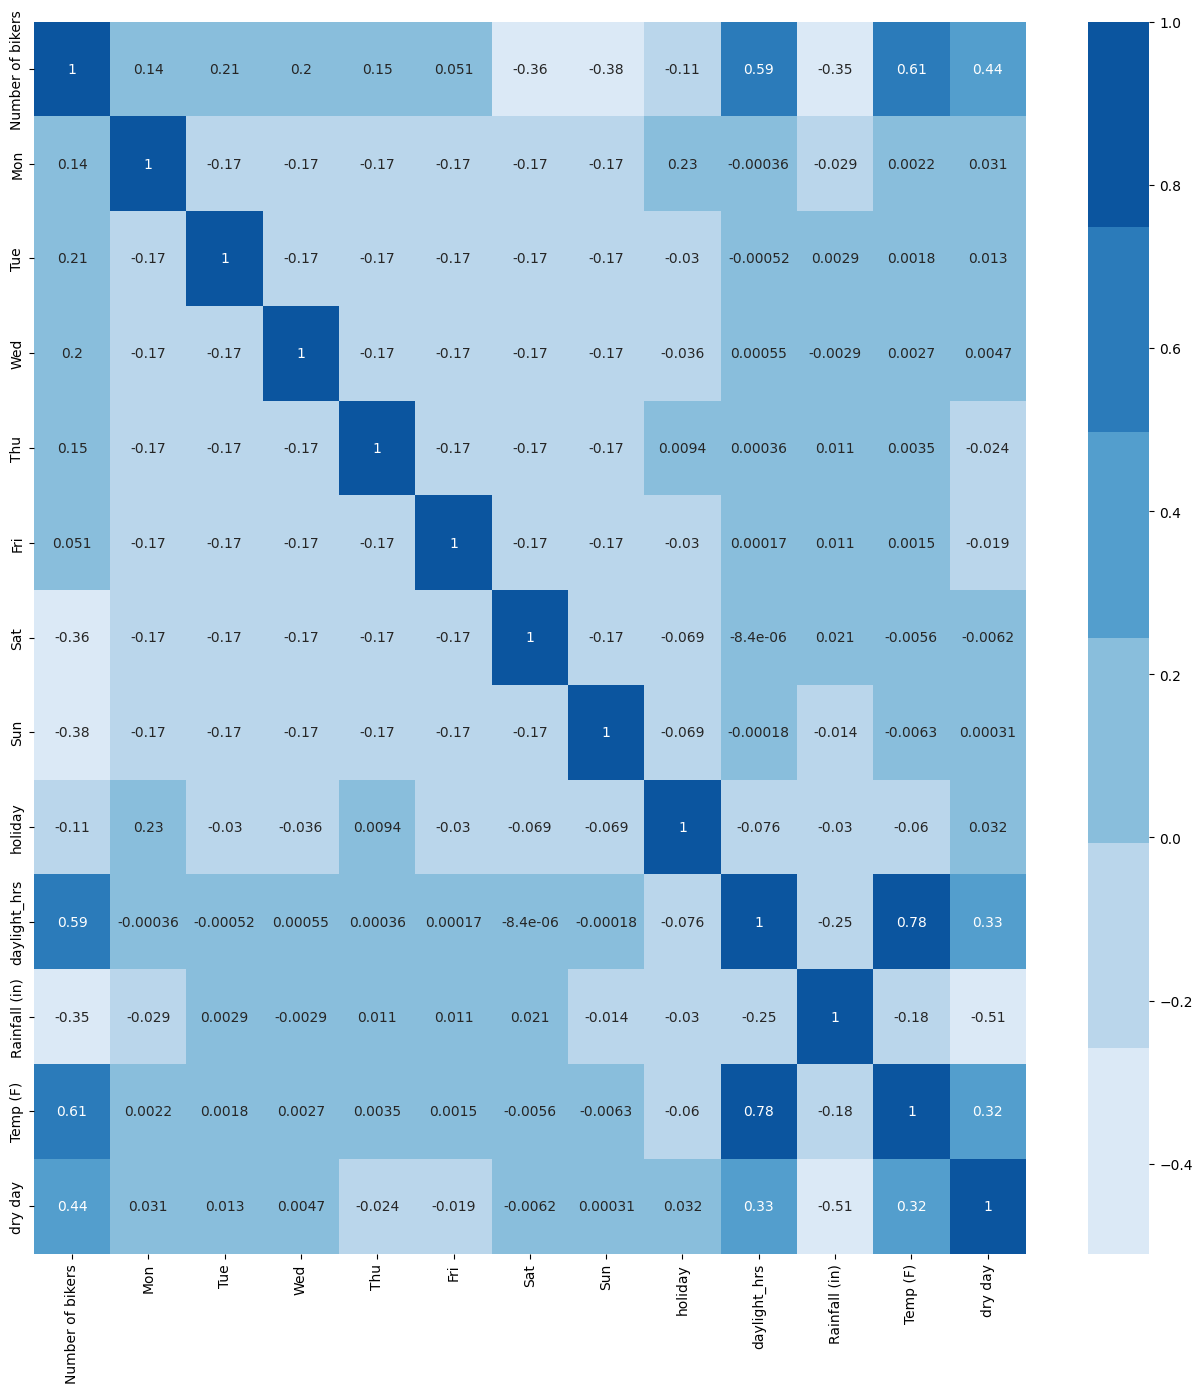

In [ ]:
#check the correlation of dataset
DataCorr = data_df.corr()

plt.subplots( figsize = (16,16))
sns.heatmap( DataCorr, annot = True, cmap = sns.color_palette('Blues'))

you can see the positive and negatiove correlation between target and other feature

the high pistive correction with dry day , temp and dry light hr
then nefative corelation with rainfall

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646 entries, 0 to 2645
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2646 non-null   object 
 1   Number of bikers  2646 non-null   float64
 2   Mon               2646 non-null   float64
 3   Tue               2646 non-null   float64
 4   Wed               2646 non-null   float64
 5   Thu               2646 non-null   float64
 6   Fri               2646 non-null   float64
 7   Sat               2646 non-null   float64
 8   Sun               2646 non-null   float64
 9   holiday           2646 non-null   float64
 10  daylight_hrs      2646 non-null   float64
 11  Rainfall (in)     2646 non-null   float64
 12  Temp (F)          2646 non-null   float64
 13  dry day           2646 non-null   int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 289.5+ KB


no missing value that no need any operation for missing value

In [ ]:
data_df.describe() # her we check the range of numerical data expect col data it is object

,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
count,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000
mean,10972.597128,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.027967,11.907412,0.117305,54.285714,0.568405
std,5479.641291,0.349993,0.349993,0.349993,0.349993,0.349993,0.349993,0.349993,0.164909,2.615865,0.264038,10.875798,0.495392
min,152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.218894,0.000000,25.000000,0.000000
25%,7105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.360658,0.000000,46.000000,0.000000
50%,10308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.812303,0.000000,53.500000,1.000000
75%,15274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.463207,0.110000,63.000000,1.000000
max,25712.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.781095,3.250000,82.000000,1.000000


In [ ]:
print(f"first day: {data_df['Date'].min()}")
print(f"last day: {data_df['Date'].max()}")

first day: 2012-10-03
last day: 2019-12-31


this col not more imapct for target we can frist tray to drop it rater than conver it to time

In [ ]:
data_df_norm = ((data_df - data_df.mean())/data_df.std()) #make normalization

<ipython-input-29-741335522871>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_df_norm = ((data_df - data_df.mean())/data_df.std())
<ipython-input-29-741335522871>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_df_norm = ((data_df - data_df.mean())/data_df.std())


In [ ]:
data_df_norm.head() #you can see the dataset in same range after normaliztion

,Date,Fri,Mon,Number of bikers,Rainfall (in),Sat,Sun,Temp (F),Thu,Tue,Wed,daylight_hrs,dry day,holiday
0,NaN,-0.408171,-0.408171,0.567811,-0.444275,-0.408171,-0.408171,0.157624,-0.408171,-0.408171,2.449027,-0.240858,0.871218,-0.169589
1,NaN,-0.408171,-0.408171,0.534233,-0.444275,-0.408171,-0.408171,0.203598,2.449027,-0.408171,-0.408171,-0.263114,0.871218,-0.169589
2,NaN,2.449027,-0.408171,0.295531,-0.444275,-0.408171,-0.408171,0.479439,-0.408171,-0.408171,-0.408171,-0.285326,0.871218,-0.169589
3,NaN,-0.408171,-0.408171,-0.538100,-0.444275,2.449027,-0.408171,0.571387,-0.408171,-0.408171,-0.408171,-0.307491,0.871218,-0.169589
4,NaN,-0.408171,-0.408171,-0.438824,-0.444275,-0.408171,2.449027,0.571387,-0.408171,-0.408171,-0.408171,-0.329606,0.871218,-0.169589


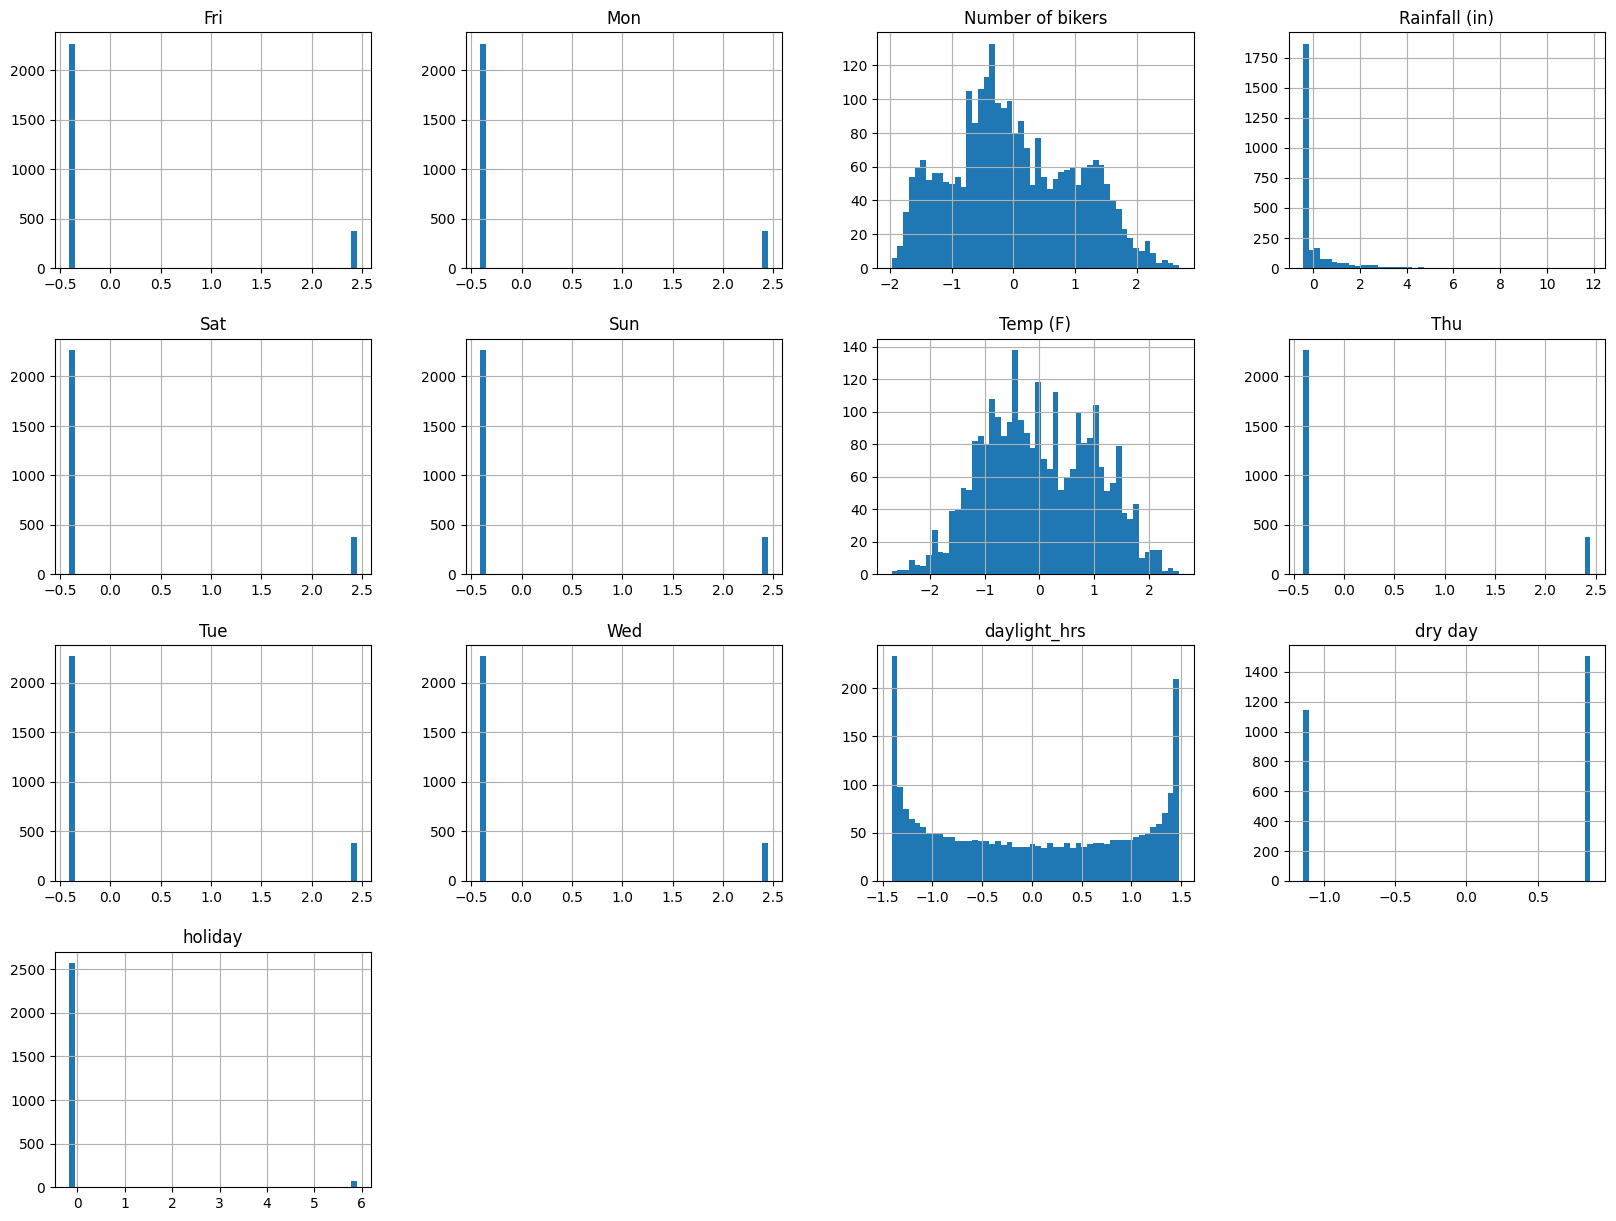

In [ ]:
#Numerical Features Histograms (Train)
num_feats = list(data_df_norm.select_dtypes(include=['int64', 'float64', 'int32']).columns)
data_df_norm[num_feats].hist(figsize=(20,15),bins=50);

In [ ]:
x_label = data_df_norm[['daylight_hrs','Rainfall (in)','Temp (F)' ]]# feature choose high correlation
y_label=data_df_norm['Number of bikers'] #target

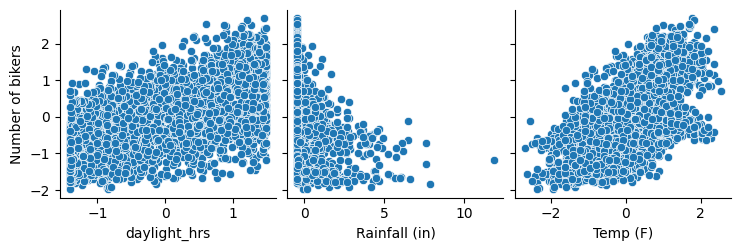

In [ ]:
pp = sns.pairplot (data = data_df_norm, x_vars = ['daylight_hrs','Rainfall (in)','Temp (F)'], y_vars = 'Number of bikers' )

In [ ]:
new_data = data_df_norm.drop('Date', axis=1)
print(new_data)# drop data no need

           Fri       Mon  Number of bikers  Rainfall (in)       Sat       Sun  \
0    -0.408171 -0.408171          0.567811      -0.444275 -0.408171 -0.408171   
1    -0.408171 -0.408171          0.534233      -0.444275 -0.408171 -0.408171   
2     2.449027 -0.408171          0.295531      -0.444275 -0.408171 -0.408171   
3    -0.408171 -0.408171         -0.538100      -0.444275  2.449027 -0.408171   
4    -0.408171 -0.408171         -0.438824      -0.444275 -0.408171  2.449027   
...        ...       ...               ...            ...       ...       ...   
2641  2.449027 -0.408171         -1.171719      -0.406402 -0.408171 -0.408171   
2642 -0.408171 -0.408171         -1.390711      -0.444275  2.449027 -0.408171   
2643 -0.408171 -0.408171         -1.328663      -0.406402 -0.408171  2.449027   
2644 -0.408171  2.449027         -0.686285      -0.292781 -0.408171 -0.408171   
2645 -0.408171 -0.408171         -1.168799       0.540433 -0.408171 -0.408171   

      Temp (F)       Thu   

#start build modling


In [ ]:
x_label = np.array(x_label) #convert to numpy
y_label = np.array(y_label)#convert to numpy
X_train, X_test, y_train, y_test = train_test_split(x_label,y_label,test_size=0.2, random_state=42) #split dataset


In [ ]:
def Train_MLE ( TrainFeatueX, TrainLabel_y ):
    w = ((np.linalg.inv(TrainFeatueX.T@TrainFeatueX))@TrainFeatueX.T@TrainLabel_y)
    return w

def MLE_Predict (x_test, W):
    pred = x_test@W.T
    return pred


In [ ]:
Coffi = Train_MLE(X_train,y_train)
predict_MLE = MLE_Predict(X_test,Coffi)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


coff = r2_score(y_test, predict_MLE )
error = mean_squared_error(y_test,predict_MLE )

print('R2', coff )
print('Error ', error )


R2 0.4788593571409533
Error  0.5120229549031164


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predict_MLE))
print('Mean Squared Error:',mean_squared_error(y_test, predict_MLE))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predict_MLE)))

Mean Absolute Error: 0.58920290460168
Mean Squared Error: 0.5120229549031164
Root Mean Squared Error: 0.7155577928463336


In [ ]:
mse = mean_squared_error(y_test, predict_MLE)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 0.7155577928463336
